✍ В предыдущем юните мы рассмотрели меры, которые можно использовать для оценки качества кластеризации, если данные являются полностью неразмеченными. Однако иногда бывает такое, что какая-то разметка в наших данных всё же есть. В этом случае мы можем использовать дополнительные показатели, которые помогут оценить качество кластеризации.

В данном юните мы рассмотрим **внешние меры**. Часть из них вы уже изучали, однако сейчас мы опишем их более строго с формальной точки зрения и будем концентрироваться не только на их смысле, но и на математической составляющей. Также мы познакомимся с некоторыми мерами, которые не рассматривали ранее.

# **ИНДЕКС РЭНДА**

Первая внешняя мера, которую мы рассмотрим, — это **индекс Рэнда**. В целом, это не совсем метрика для оценки качества кластеризации: индекс Рэнда — это мера сходства между двумя кластеризациями. Однако, так как он позволяет сравнить два разбиения на кластеры, мы можем использовать его для сравнения фактических меток классов и прогнозируемых меток кластеров, тем самым оценивая качество наших алгоритмов.

Данный индекс сравнивает фактическое разбиение и результат применения алгоритма кластеризации и оценивает, сколько пар, находившихся в одном или в разных кластерах, сохранили это состояние.

Индекс Рэнда вычисляется по следующей формуле:

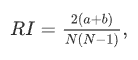

где

+ $N$ — количество объектов в выборке;
+ $a$ — число пар объектов, которые имеют одинаковые метки (т. е. в фактическом разбиении находятся в одном классе) и располагаются в одном кластере;
+ $b$ — число пар объектов, которые имеют различные метки (т. е. в фактическом разбиении находятся в разных классах) и располагаются в разных кластерах.

**Обратите внимание**, что знаменатель здесь выражает общее количество пар, которые можно получить из нашего набора данных. То есть, по сути, в этом индексе вычисляется доля пар, для которых сохранилось их расположение по отношению друг к другу.

Рассмотрим пример вычисления индекса Рэнда.

Допустим в нашем наборе данных есть пять элементов: $(A, B, C, D, E)$.

Мы предполагаем, что изначально они принадлежат к двум классам, и вектор их меток выглядит следующим образом: $(1, 1, 1, 2, 2)$. По результатам кластеризации объектам были присвоены следующие метки принадлежности к кластерам: $(1, 1, 2, 2, 3)$.

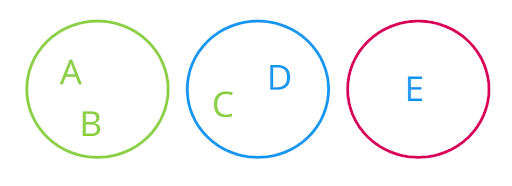

**Примечание.** Здесь цветами кругов отмечены кластеры, а цветами букв — истинные метки.

Для того чтобы вычислить индекс Рэнда, в первую очередь необходимо выписать все неупорядоченные (т. е. без учёта их последовательности) пары объектов. Они будут следующими:

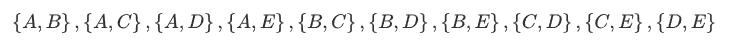

Теперь нам необходимо найти для формулы индекса Рэнда значение $a$, отвечающее за число пар объектов, имеющих одинаковые метки и находящихся в одном и том же кластере. Такая пара у нас только одна — {$A, B$}, а значит, $a = 1$.

Далее найдём значение $b$, отражающее число пар объектов, имеющих различные метки в фактическом разбиении и находящихся в разных кластерах. Таких пар у нас пять: {$A, D$}, {$A, E$}, {$B, D$}, {$B, E$}, {$C, E$}. Итак, $b = 5$.

Теперь мы можем найти индекс Рэнда:

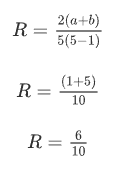

Получается, что индекс Рэнда равен $0.6$. Из этого можно сделать вывод, что разбиения довольно сильно схожи (так как значение ближе к $1$, чем к $0$), однако полного совпадения не достигается.

Для вычисления индекса Рэнда с помощью библиотеки sklearn можно использовать метод rand_score():

In [1]:
import numpy as np
from sklearn.metrics.cluster import rand_score


print(rand_score([1, 1, 1, 2, 2], [1, 1, 2, 2, 3]))

0.6


Также используют **скорректированный индекс Рэнда (Adjusted Rand Index):**

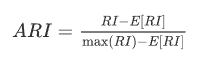

Его преимущество перед обычным индексом Рэнда состоит в том, что при случайных кластеризациях его значение близко к нулю вне зависимости от количества кластеров и наблюдений.

Исправленный индекс Рэнда в sklearn представлен через метод adjusted_rand_score().

Интерпретация скорректированного индекса Рэнда:

+ Отрицательные значения индекса говорят о различных, независимых разбиениях.
+ Значения, близкие к нулю, являются индикаторами случайного разбиения.
+ Положительные значения показывают схожесть разбиений (значение, равное $1$, получается при полном совпадении кластеризаций).

# **НОРМАЛИЗОВАННАЯ ВЗАИМНАЯ ИНФОРМАЦИЯ**

Следующая мера — **NMI (Normalized Mutual Information)**, или **нормализованная взаимная информация**. Она определяется следующим образом:

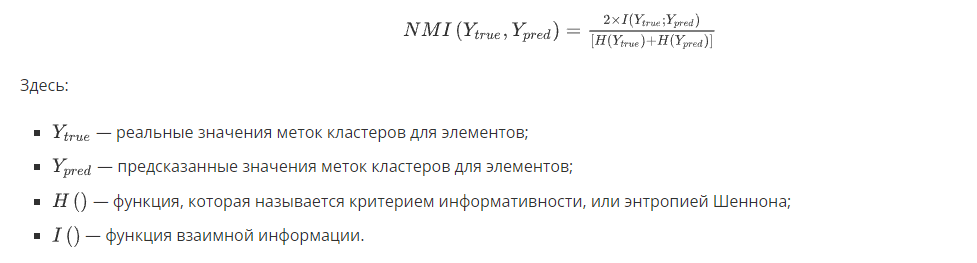



Давайте на примере рассмотрим, как можно применить эту формулу для оценки качества кластеризации.

Пусть у нас есть три класса объектов, которые разбили на два кластера:

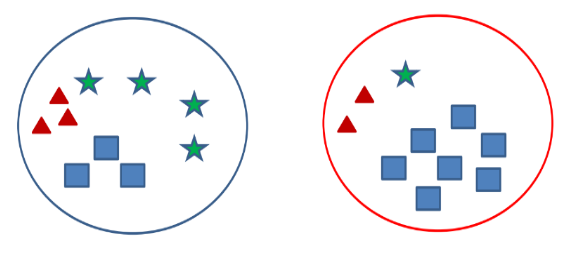

Для начала рассчитаем энтропию Шеннона. Напомним, что она вычисляется следующим образом:

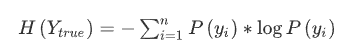

В данной формуле:

+ $n$ — количество объектов;
+ $y_i$ — различные значения принадлежности к кластерам.

Посмотрим, как вычислить значения энтропии, которые находятся в знаменателе.

Сначала посчитаем вероятности принадлежности к различным классам:

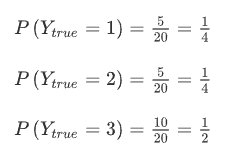

После этого вычислим энтропию (в качестве основания логарифма выступает $2$):

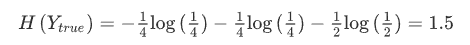

Повторяем то же самое для принадлежности к кластерам:

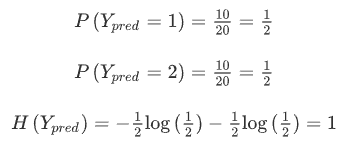

Отлично, значения для знаменателя получены. Для того чтобы вычислить значение из числителя, необходимо вычислить взаимную информацию, которая выражается следующим образом:

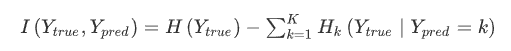

Для этого найдём условные вероятности для первого кластера:

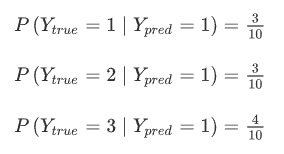

и вычислим условную энтропию:

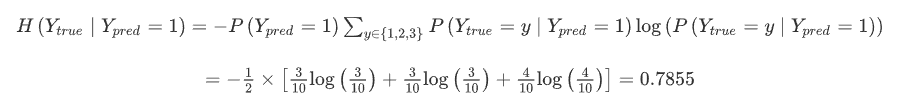

Повторим это для второго кластера:

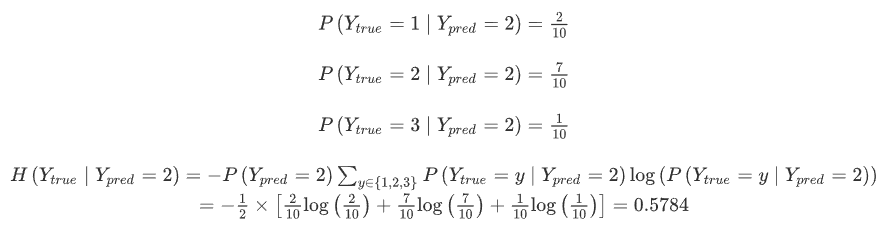

И, наконец, вычислим значение показателя нормализованной общей информации:

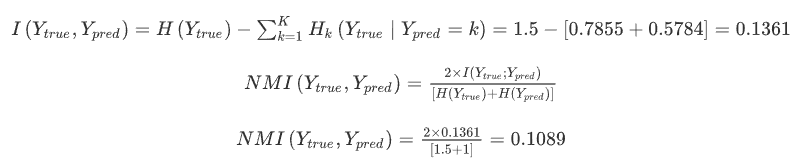

**Обращаем ваше внимание**, что при вычислении в Python значение будет отличаться в силу того, что при расчёте энтропии у логарифма могут быть разные основания: мы рассмотрели логарифм с основанием 2 для простоты вычислений, а в библиотеке sklearn используется натуральный логарифм. Однако, разумеется, данные вычисления носят лишь ознакомительный характер (чтобы было понятнее, как реализуется мера), и их не потребуется когда-либо вычислять вручную.

В sklearn для вычисления NMI существует метод normalized_mutual_info_score().

С точки зрения оценки качества разбиения коэффициент должен быть как можно ближе к единице: нулевое значение указывает на случайное разбиение, а 1 — на максимальную согласованность. В нашем случае значение получилось ближе к 0, но, учитывая предложенное разбиение (далёкое от необходимого), это ожидаемый результат.

# **ОДНОРОДНОСТЬ**

Следующая метрика, которую мы рассмотрим, вам уже известна — это **однородность** (ещё её называют **гомогенностью**). Она показывает, насколько элементы в кластере похожи между собой, и вычисляется по следующей формуле:

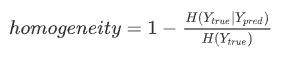

Мы не будем приводить здесь полные вычисления этой метрики из-за их сложности. В данной формуле, как и в предыдущей, используется энтропия, так что при желании вы можете попрактиковаться в её использовании, однако на практике это не понадобится.

Однородность также можно вычислить, воспользовавшись методом homogeneity_score() из библиотеки sklearn.

Важно, чтобы показатель гомогенности был как можно ближе к единице: это говорит о том, что в кластере находятся элементы одного и того же класса. Если он близок к нулю, это означает, что в кластере находятся элементы из разных классов.

# **ПОЛНОТА**

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, оказались в одном кластере.

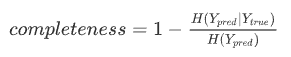

По аналогии с однородностью, важно, чтобы значение метрики было близко к единице.

Для вычисления полноты с помощью библиотеки sklearn используется метод completeness_score().

Рассмотрим два примера.

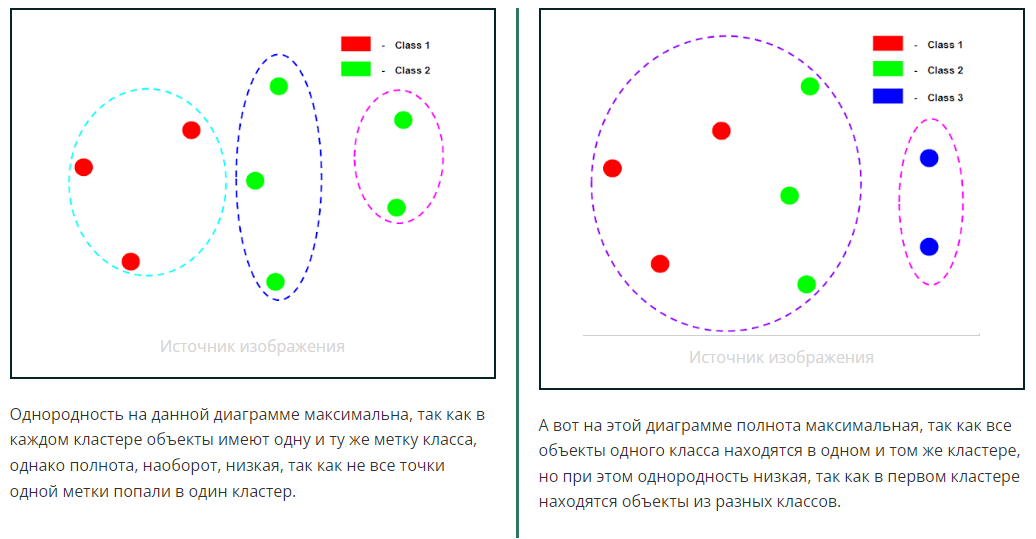

Эти примеры говорят нам о том, что высокий показатель для одной из метрик совершенно не является свидетельством качественного разбиения и необходимо рассматривать несколько мер.

# **V-МЕРА**

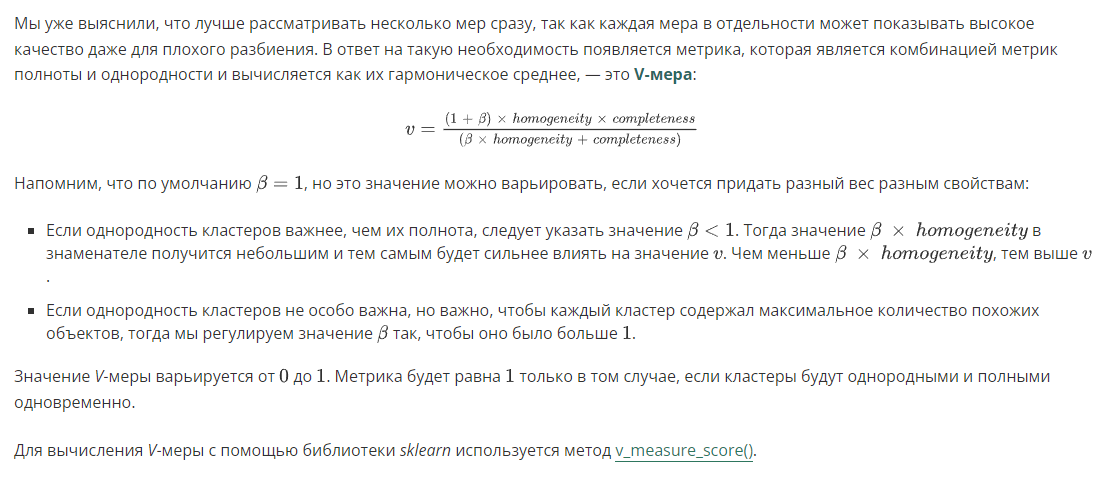

Давайте сведём основную информацию обо всех рассмотренных внешних мерах в небольшую таблицу:

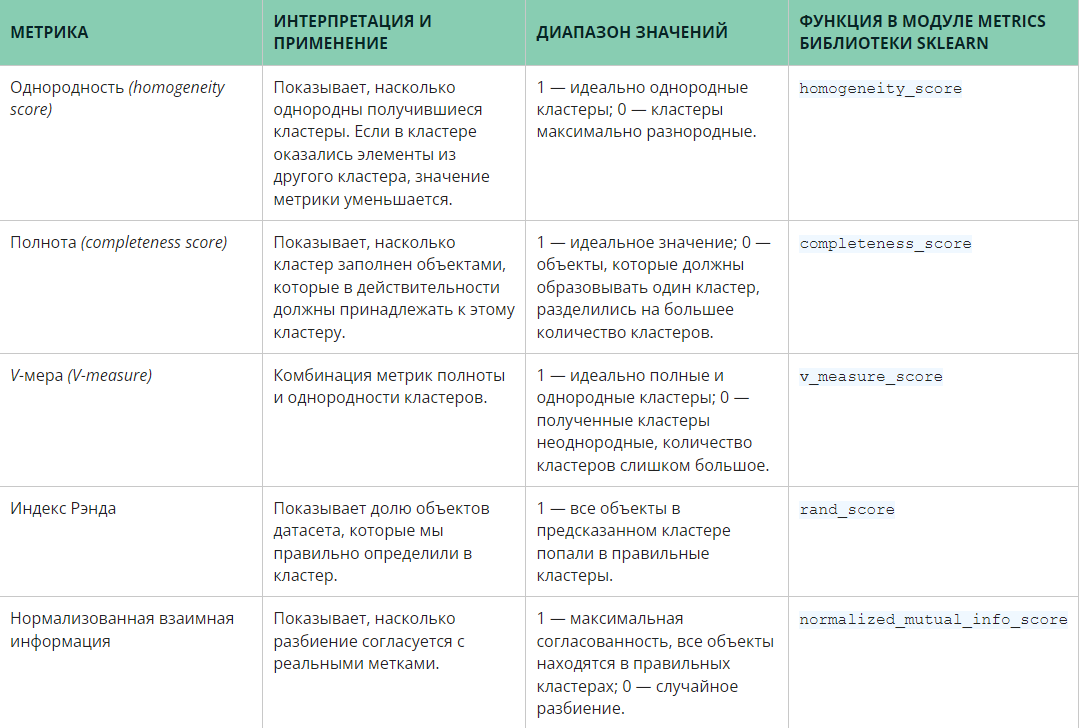

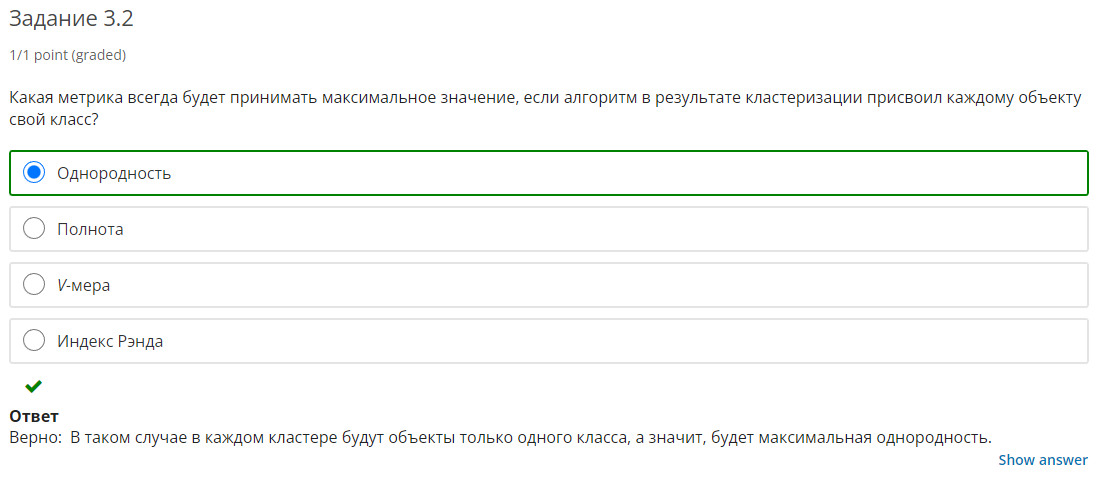

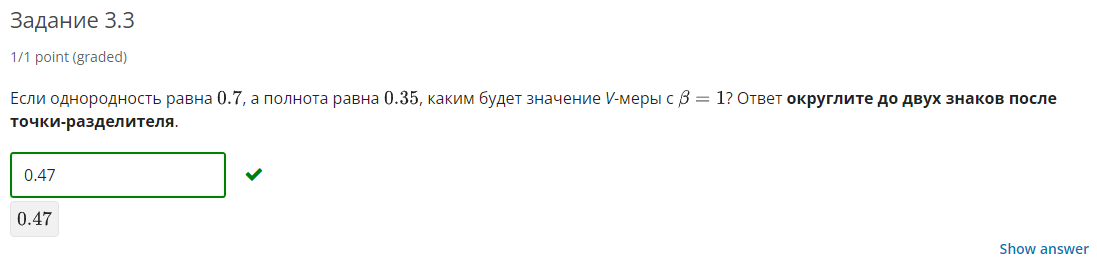

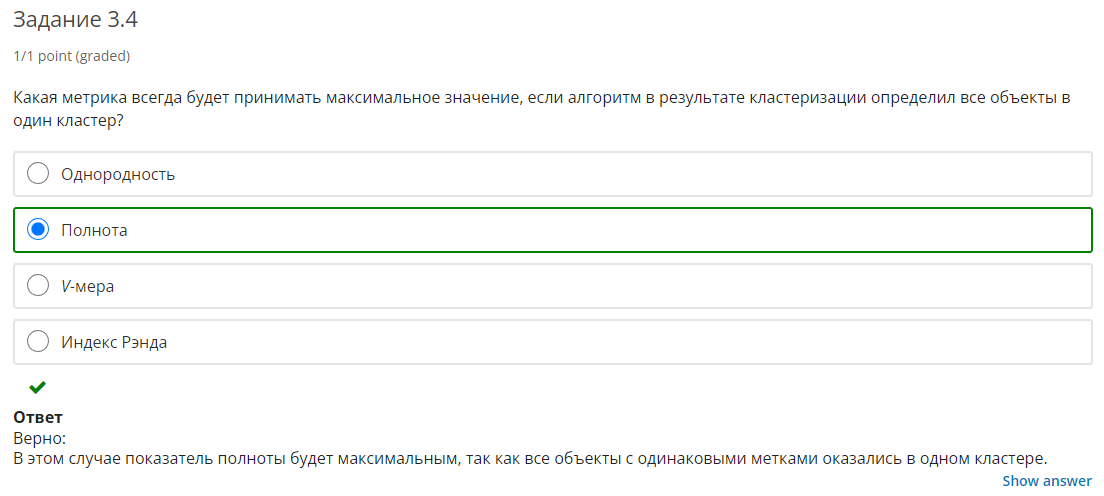

⭐ Итак, мы рассмотрели все основные меры, которые можно использовать для оценки качества кластеризации.

Стоит отметить, что у всех перечисленных метрик есть большой недостаток: для их использования необходимо знать истинные принадлежности к кластерам. На практике это практически всегда недоступно (а если разметка всё же есть, то проще перейти к задаче классификации) или требует финансовых и трудовых затрат, к примеру, если мы делаем разметку вручную.

Однако иногда вычисление подобных мер может принести пользу, и уже в следующем юните вы попробуете применить их для решения задачи →